<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
import tensorflow as tf
import tensorflow.keras as k
from keras.datasets import boston_housing
import numpy as np
import pandas as pd

In [0]:
SEED = np.random.seed(42)

In [0]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

X_train = k.utils.normalize(X_train)
X_test = k.utils.normalize(X_test)

In [217]:
y_train[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [218]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.002412,0.000000,0.015930,0.0,0.001053,0.012020,0.179454,0.007783,0.007828,0.600788,0.041096,0.776719,0.036634
1,0.000041,0.154587,0.003804,0.0,0.000778,0.014260,0.029418,0.011749,0.003748,0.652077,0.027545,0.740857,0.005827
2,0.006345,0.000000,0.023446,0.0,0.000817,0.006438,0.129538,0.001726,0.031089,0.862723,0.026167,0.486441,0.004223
3,0.000087,0.000000,0.011339,0.0,0.001125,0.013190,0.075376,0.013077,0.010924,0.489400,0.044133,0.867155,0.017500
4,0.004743,0.000000,0.023248,0.0,0.000916,0.008189,0.113541,0.003297,0.030826,0.855411,0.025945,0.502753,0.018816
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.000472,0.000000,0.014855,0.0,0.000963,0.012043,0.133288,0.013087,0.006449,0.500906,0.038482,0.853261,0.034827
400,0.000355,0.043808,0.015245,0.0,0.001016,0.013668,0.035703,0.009701,0.006571,0.488455,0.040741,0.869363,0.014435
401,0.000073,0.073644,0.012751,0.0,0.000921,0.012690,0.049026,0.013973,0.002104,0.639647,0.035559,0.762211,0.016475
402,0.004372,0.000000,0.039831,0.0,0.001772,0.011614,0.200377,0.003302,0.010171,0.819818,0.029904,0.532882,0.032121


### Baseline

In [0]:
housing_model = k.Sequential()

In [220]:
# Input => Hidden
housing_model.add(k.layers.Dense(12, input_dim=13, activation='relu'))
# Output
housing_model.add(k.layers.Dense(1))

#Compile
housing_model.compile(loss='mean_squared_error',
                    optimizer='adam',
                    metrics=['mse'])

housing_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 12)                168       
_________________________________________________________________
dense_170 (Dense)            (None, 1)                 13        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [0]:

history = housing_model.fit(X_train,y_train, epochs=100, verbose=False)

In [222]:
scores = housing_model.evaluate(X_test, y_test)
print(f'{housing_model.metrics_names[1]}: {scores[1]}')

102/102 [==============================] - 0s 3ms/sample - loss: 79.8264 - mean_squared_error: 79.8264
mean_squared_error: 79.82642364501953


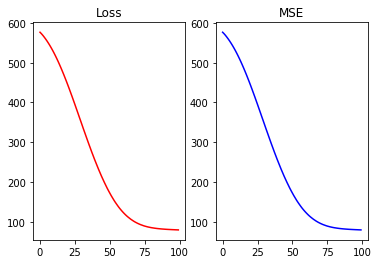

In [223]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2)) = plt.subplots(1,2)
ax1.plot(history.history['loss'], color = 'r')
ax1.set_title("Loss")
ax2.plot(history.history['mean_squared_error'], color = 'b')
ax2.set_title("MSE");

## 2nd iter

In [0]:
housing_model = k.Sequential(name='round2...fight')

In [225]:
# Input => Hidden
housing_model.add(k.layers.Dense(12, input_dim=13, activation='linear'))
# Hidden
housing_model.add(k.layers.Dense(2000, activation='relu'))
housing_model.add(k.layers.Dense(2000, activation='linear'))

# Output
housing_model.add(k.layers.Dense(1,activation='linear'))

#Compile
housing_model.compile(loss='mean_squared_error',
                    optimizer='adam',
                    metrics=['mse', 'mae'])

housing_model.summary()

Model: "round2...fight"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 12)                168       
_________________________________________________________________
dense_172 (Dense)            (None, 2000)              26000     
_________________________________________________________________
dense_173 (Dense)            (None, 2000)              4002000   
_________________________________________________________________
dense_174 (Dense)            (None, 1)                 2001      
Total params: 4,030,169
Trainable params: 4,030,169
Non-trainable params: 0
_________________________________________________________________


In [226]:
history = housing_model.fit(X_train,y_train, epochs=100, verbose=5)

Train on 404 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100


In [227]:
scores = housing_model.evaluate(X_test, y_test)
print(f'{housing_model.metrics_names[1]}: {scores[1]}')

102/102 [==============================] - 0s 3ms/sample - loss: 33.2181 - mean_squared_error: 33.2181 - mean_absolute_error: 4.1344
mean_squared_error: 33.218082427978516


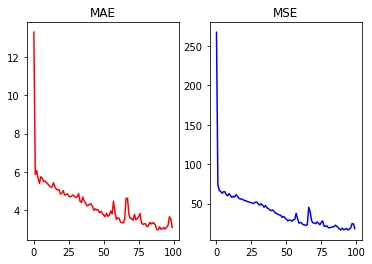

In [232]:
fig, ((ax1,ax2)) = plt.subplots(1,2)
ax1.plot(history.history['mean_absolute_error'], color = 'r')
ax1.set_title("MAE")
ax2.plot(history.history['mean_squared_error'], color = 'b')
ax2.set_title("MSE");

### Linear Model


In [233]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

lr.fit(X_train, y_train)

preds = lr.predict(X_test)

MSE = mean_squared_error(y_test, preds)
print(f'{MSE:.05f}')

18.16551


## Feature Engineering


0. - CRIM - per capita crime rate by town
1. - ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
2. - INDUS - proportion of non-retail business acres per town.
3. - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
4. - NOX - nitric oxides concentration (parts per 10 million)
5. - RM - average number of rooms per dwelling
6. - AGE - proportion of owner-occupied units built prior to 1940
7. - DIS - weighted distances to five Boston employment centres
8. - RAD - index of accessibility to radial highways
9. - TAX - full-value property-tax rate per $10,000

9. - PTRATIO - pupil-teacher ratio by town
10. - B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
11. - LSTAT - % lower status of the population
12. - MEDV - Median value of owner-occupied homes in $1000's

In [0]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

df = pd.DataFrame(X_train)
df[13] = pd.Series(y_train)
df1 = pd.DataFrame(X_test)
df1[13] = pd.Series(y_test)
df = pd.concat([df, df1])

In [235]:
print(df.shape)
df.head()

(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [236]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
for col in df.columns:
  df[f'{col}_outlier'] = df[col].apply(lambda x: 1 if x > \
                                       np.mean(df[col]) + (np.std(df[col])*2)  # 2 standard deviations away from the mean
                                       else 0)


In [0]:
from sklearn.model_selection import train_test_split as tts

target = 13
omit = [13, '13_outlier']
feats = [col for col in df.columns if col not in omit]

X = df[feats]
y = df[target]

X_train, X_test, y_train, y_test = tts(X,y, test_size=.1 ,random_state=SEED)

In [0]:
X_train = k.utils.normalize(X_train)
X_test = k.utils.normalize(X_test)

In [253]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(f'{((18.16 - mean_squared_error(y_test, y_pred))/18.16)*100:.02f}%\
 improvement')


36.24% improvement


In [248]:
X_train.shape

(455, 26)

In [257]:
housing_model = k.Sequential(name='round3...fight')

# Input => Hidden
housing_model.add(k.layers.Dense(13, input_dim=26, activation='linear'))
# Hidden
housing_model.add(k.layers.Dense(500, activation='relu'))
housing_model.add(k.layers.Dense(500, activation='linear'))

# Output
housing_model.add(k.layers.Dense(1,activation='linear'))

#Compile
housing_model.compile(loss='mean_squared_error',
                    optimizer='adam',
                    metrics=['mse', 'mae'])

housing_model.summary()

Model: "round3...fight"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_182 (Dense)            (None, 12)                324       
_________________________________________________________________
dense_183 (Dense)            (None, 500)               6500      
_________________________________________________________________
dense_184 (Dense)            (None, 500)               250500    
_________________________________________________________________
dense_185 (Dense)            (None, 1)                 501       
Total params: 257,825
Trainable params: 257,825
Non-trainable params: 0
_________________________________________________________________


In [258]:
history = housing_model.fit(X_train,y_train, epochs=100, verbose=5)

Train on 455 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100


In [259]:
scores = housing_model.evaluate(X_test, y_test)
print(f'{housing_model.metrics_names[1]}: {scores[1]}')

51/51 [==============================] - 0s 6ms/sample - loss: 17.9207 - mean_squared_error: 17.9207 - mean_absolute_error: 3.3238
mean_squared_error: 17.920656204223633


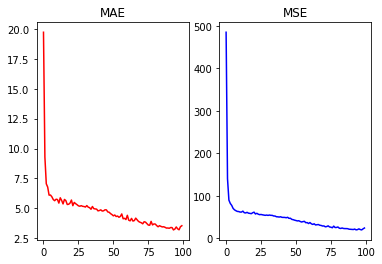

In [260]:
fig, ((ax1,ax2)) = plt.subplots(1,2)
ax1.plot(history.history['mean_absolute_error'], color = 'r')
ax1.set_title("MAE")
ax2.plot(history.history['mean_squared_error'], color = 'b')
ax2.set_title("MSE");

In [262]:
print(f'{((33.2-17.9)/33.2)*100:.02f}% improvement')

46.08% improvement


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
##### Your Code Here #####

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.